## Numerically Solving the Potts Model 

In [79]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Defining the free energy and its derivatives 

Here $f(m_x,m_y,\beta J)=\frac{\beta J}{2}(m_x^2+m_y^2) + \ln\left( e^{\beta Jm_x} + e^{-\beta J\frac{m_x}{2}}2\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)$, and its derivatives are 
$$f_x(m_x,m_y, \beta J)=\beta Jm_x + \frac{\beta Je^{\beta Jm_x}-\beta J e^{-\beta J \frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}$$
$$f_y(m_x,m_y, \beta J)=\beta Jm_y + \frac{\sqrt{3}\beta J e^{-\beta J \frac{m_x}{2}}\sinh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}$$
$$
    f_{xx}(m_x,m_y, \beta J)=\beta J - \frac{\left( \beta Je^{\beta Jm_x}-\beta J e^{-\beta J \frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)^2}{\left( e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)^2} + \frac{(\beta J)^2e^{\beta Jm_x}+\frac{(\beta J)^2}{2} e^{-\beta J \frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}
$$
$$
    f_{yy}(m_x,m_y, \beta J)=\beta J + \frac{3(\beta J)^2 e^{-\beta J \frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{2\left( e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)} - \frac{3(\beta J)^2 e^{-\beta J m_x}\sinh^2 \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{\left( e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)^2}
$$
$$
    f_{xy}(m_x,m_y, \beta J)= -\frac{\sqrt{3}(\beta J)^2 e^{-\beta J \frac{m_x}{2}}\sinh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{2\left( e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)} - \frac{\sqrt{3}\beta J e^{-\beta J \frac{m_x}{2}}\left(\beta J e^{\beta J m_x} - \beta Je^{-\beta J \frac{m_x}{2}} \cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)\right)\sinh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right)}{\left( e^{\beta Jm_x} + 2e^{-\beta J\frac{m_x}{2}}\cosh \left( \frac{\sqrt{3}}{2}\beta Jm_y \right) \right)^2}
$$


In [84]:

def f(m_x, m_y, T):
    """Calculate the function f(m_x, m_y, beta J)."""
    term1 = 1/T * (m_x**2 + m_y**2) / 2
    exp1 = np.exp(1/T * m_x)
    exp2 = np.exp(-1/T * m_x / 2)
    cosh_term = np.cosh(np.sqrt(3) * 1/T * m_y / 2)
    term2 = np.log(exp1 + 2 * exp2 * cosh_term)
    return term1 + term2

def f_x(m, T):
    m_x,m_y=m
    """Calculate the first derivative f_x."""
    exp1 = np.exp(1/T * m_x)
    exp2 = np.exp(-1/T * m_x / 2)
    cosh_term = np.cosh(np.sqrt(3) * 1/T * m_y / 2)
    
    numerator = 1/T * exp1 - 1/T * exp2 * cosh_term
    denominator = exp1 + 2 * exp2 * cosh_term
    return 1/T * m_x + numerator / denominator

def f_y(m, T):
    m_x,m_y=m
    """Calculate the first derivative f_y."""
    exp1 = np.exp(1/T * m_x)
    exp2 = np.exp(-1/T * m_x / 2)
    cosh_term = np.cosh(np.sqrt(3) * 1/T * m_y / 2)
    sinh_term = np.sinh(np.sqrt(3) * 1/T * m_y / 2)
    
    numerator = np.sqrt(3) * 1/T * exp2 * sinh_term
    denominator = exp1 + 2 * exp2 * cosh_term
    return 1/T * m_y + numerator / denominator

def f_xx(m_x, m_y, T):
    """Calculate the second derivative f_xx."""
    exp1 = np.exp(1/T * m_x)
    exp2 = np.exp(-1/T * m_x / 2)
    cosh_term = np.cosh(np.sqrt(3) * 1/T * m_y / 2)
    
    numerator1 = 1/T * exp1 - 1/T * exp2 * cosh_term
    denominator = exp1 + 2 * exp2 * cosh_term
    first_term = 1/T
    second_term = -(numerator1**2) / (denominator**2)
    
    numerator2 = (1/T)**2 * exp1 + ((1/T)**2 / 2) * exp2 * cosh_term
    return first_term + second_term + numerator2 / denominator

def f_yy(m_x, m_y, T):
    """Calculate the second derivative f_yy."""
    exp1 = np.exp(1/T * m_x)
    exp2 = np.exp(-1/T * m_x / 2)
    cosh_term = np.cosh(np.sqrt(3) * 1/T * m_y / 2)
    sinh_term = np.sinh(np.sqrt(3) * 1/T * m_y / 2)
    
    first_term = 1/T
    second_term = 3 * ((1/T)**2) * exp2 * cosh_term / (2 * (exp1 + 2 * exp2 * cosh_term))
    third_term = -3 * ((1/T)**2) * exp2 * sinh_term**2 / ((exp1 + 2 * exp2 * cosh_term)**2)
    return first_term + second_term + third_term

def f_xy(m_x, m_y, T):
    """Calculate the second derivative f_xy."""
    exp1 = np.exp(1/T * m_x)
    exp2 = np.exp(-1/T * m_x / 2)
    cosh_term = np.cosh(np.sqrt(3) * 1/T * m_y / 2)
    sinh_term = np.sinh(np.sqrt(3) * 1/T * m_y / 2)
    
    first_term = -np.sqrt(3) * ((1/T)**2) * exp2 * sinh_term / (2 * (exp1 + 2 * exp2 * cosh_term))
    
    numerator = 1/T * exp1 - 1/T * exp2 * cosh_term
    second_term = -np.sqrt(3) * 1/T * exp2 * numerator * sinh_term / ((exp1 + 2 * exp2 * cosh_term)**2)
    return first_term + second_term


### Defining the equations of state and the stability condition 

Now $(m_x,m_y)$ must satisfy the following set of conditions in order to minimize $f(m_x,m_y,t)$ 
$$f_x(m_x,m_y, t)=0, \quad f_y(m_x,m_y, t)=0, $$
$$f_{xx}(m_x,m_y, t)\cdot f_{yy}(m_x,m_y, t) - (f_{xy}(m_x,m_y, t))^2 > 0, \quad \textrm{and} \quad f_{xx}(m_x,m_y, t) >0.$$

In [140]:
def first_eqs(m, T): 
    return f_x(m, T)==0

def second_eqs(m, T): 
    return  f_y(m, T)==0

def stability_condition(m_x, m_y, T): 
    return True if f_xx(m_x, m_y, T)*f_yy(m_x, m_y, T) - (f_xy(m_x, m_y, T))**2 and f_xx(m_x, m_y, T) > 0 else False 

In [159]:
# Solve for a range of temperatures
T_vals = np.linspace(0.01, 2, 1000)
m_x_vals = []
m_y_vals = []

for t in T_vals:
    sol = fsolve(lambda m: [first_eqs(m, t), second_eqs(m, t)], [0, 0])  # Initial guess [0, 0]
    m_x_vals.append(sol[0])
    m_y_vals.append(sol[1]) 

for i in range(len(T_vals)): 
    if not stability_condition(m_x_vals[i],m_y_vals[i],T_vals[i]): 
        m_x_vals.pop(i)
        m_y_vals.pop(i)
        np.delete(T_vals,i)



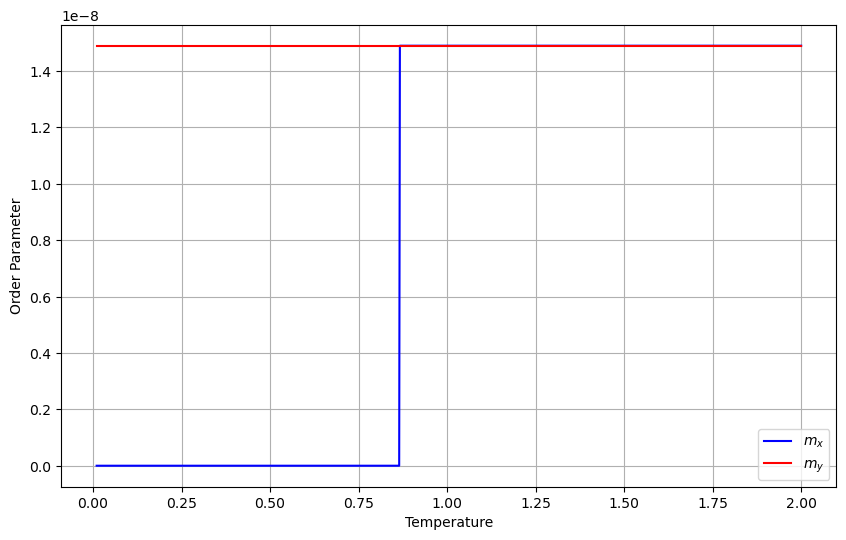

In [160]:
# Plot
fig=plt.figure(figsize=(10, 6))
plt.plot(T_vals, m_x_vals, label=r'$m_x$', color='blue')
plt.plot(T_vals, m_y_vals, label=r'$m_y$', color='red')
plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1e-23)  # Adjusted limit to observe behavior at low T
#plt.yticks(color='w')
plt.show()